# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [1]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
bill,"[audience cheering, whistling] [emcee] Ladies ...",gabriel
brian,♪ [Rock] [crowd cheering] [man] let’s give a b...,oswalt
dave,This is Dave. He tells dirty jokes for a livin...,bill
fortune,[upbeat music plays] [audience cheering] [anno...,kathleen
gabriel,[man] Can you please state your name? Martin M...,vir
jim,"(audience cheering, applauding) Thank you! Tha...",jim
kathleen,[chattering] [man] Whoo! [chattering] [woman] ...,fortune
oswalt,[“Hard to Kill” by Bleached plays] [audience c...,brian
vir,I lost 80% of my mind. It’s very freeing. You ...,dave


In [2]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
bill,"[audience cheering, whistling] [emcee] Ladies ...",gabriel,0.063112,0.533442
brian,♪ [Rock] [crowd cheering] [man] let’s give a b...,oswalt,0.110417,0.499141
dave,This is Dave. He tells dirty jokes for a livin...,bill,-0.004069,0.513958
fortune,[upbeat music plays] [audience cheering] [anno...,kathleen,0.131908,0.491932
gabriel,[man] Can you please state your name? Martin M...,vir,0.112966,0.475079
jim,"(audience cheering, applauding) Thank you! Tha...",jim,0.134896,0.497251
kathleen,[chattering] [man] Whoo! [chattering] [woman] ...,fortune,0.030903,0.489910
oswalt,[“Hard to Kill” by Bleached plays] [audience c...,brian,0.054186,0.507905
vir,I lost 80% of my mind. It’s very freeing. You ...,dave,0.100228,0.498550


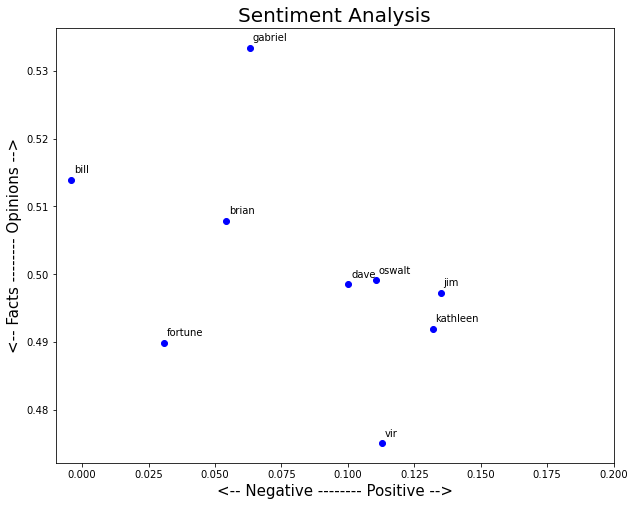

In [3]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .20)
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

### Findings 

* Vir,Bill,Oswalt,Brian do same Kind of Comedy as they do Clustering
* Gabriel talks more About OPionins

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [4]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [5]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
bill,"[audience cheering, whistling] [emcee] Ladies ...",gabriel,0.063112,0.533442
brian,♪ [Rock] [crowd cheering] [man] let’s give a b...,oswalt,0.110417,0.499141
dave,This is Dave. He tells dirty jokes for a livin...,bill,-0.004069,0.513958
fortune,[upbeat music plays] [audience cheering] [anno...,kathleen,0.131908,0.491932
gabriel,[man] Can you please state your name? Martin M...,vir,0.112966,0.475079
jim,"(audience cheering, applauding) Thank you! Tha...",jim,0.134896,0.497251
kathleen,[chattering] [man] Whoo! [chattering] [woman] ...,fortune,0.030903,0.489910
oswalt,[“Hard to Kill” by Bleached plays] [audience c...,brian,0.054186,0.507905
vir,I lost 80% of my mind. It’s very freeing. You ...,dave,0.100228,0.498550


In [6]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t,10)
    list_pieces.append(split)
    
list_pieces

[["[audience cheering, whistling] [emcee] Ladies and gentlemen, Bill Burr! [cheering and applause] All right, thank you! Thank you very much. Thank you, thank you, thank you. How are ya? How’s it goin’? All right. You guys standin’ up, sit down. Sit down. See if I’m funny. I’ve been inside for a year and a half just like you. All right. It’s nice to be out here in Denver, man. [cheering] [chuckles] It’s legal on a state level, but not on a federal level, man. Everybody out here dressing like they’re fuckin’ goin’ hiking. [chuckles] Your North Face pajamas and all this shit you guys have. You guys all live inside. So, how have you guys been doin’, man? How has your pandemic been? You enjoyed it? You been staying inside? Are you being safe? [man] No! I am so fed up with people… “I ain’t bein’ safe! I don’t fuckin’ believe in it!” “It’s all a bunch of lies!” We’re just totally divided. The people that are like, “You gotta get vaccinated.” “You have to wrap yourself in an afghan, and you g

In [7]:
# The list has 8 elements, one for each transcript
len(list_pieces)

9

In [8]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [9]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)   
polarity_transcript

[[0.11097605895262148,
  0.06714559386973187,
  0.0458522297808012,
  -0.004234421360474724,
  0.06338154761904762,
  0.040619374897725394,
  0.05825207039337474,
  0.10667417260159202,
  -0.022676218708827436,
  0.14554381777463457],
 [0.08043523242630388,
  0.10740669240669243,
  0.06769293924466338,
  0.15418065599173553,
  0.20751322751322748,
  0.10742753623188403,
  0.13416119321291736,
  0.0015186426476749121,
  0.07232142857142858,
  0.16232147482147483],
 [-0.05093449586407334,
  -0.07101471980837788,
  0.035829891691960644,
  0.08313791054959534,
  -0.026718682968682954,
  0.09782737058599124,
  -0.12493321942974718,
  -0.08041766347687401,
  -0.06019759281122916,
  0.15191938178780284],
 [0.14716566082451496,
  0.040745088245088254,
  0.021572272565742706,
  0.17364920634920636,
  0.09531158142269254,
  0.12926587301587303,
  0.15842883554937118,
  0.18193833943833942,
  0.1917005135387489,
  0.17417722305017388],
 [0.1478642531823336,
  0.1437414963209683,
  0.0842965048717

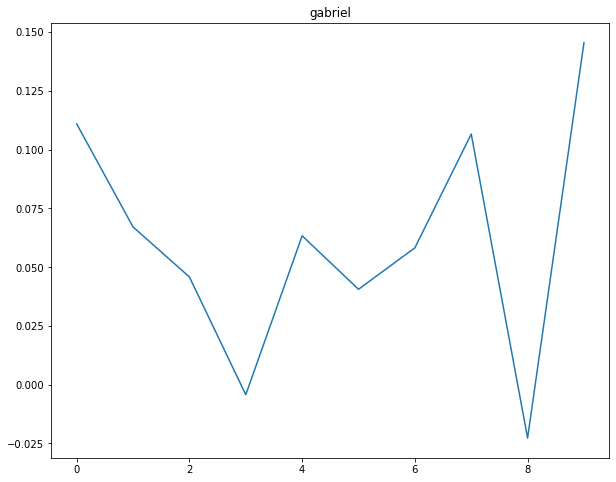

In [10]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(data['full_name'].index[4])
plt.show()

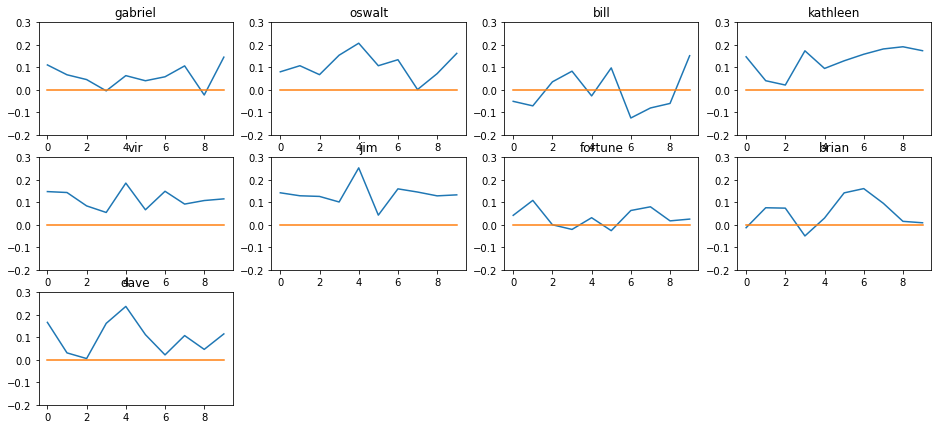

In [11]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16,12]


for index, comedian in enumerate(data.index):    
    plt.subplot(5, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

* Vir and Kathleen  stays generally positive throughout her routine.
* Jim and Fortune has been little bit negative near mid show. 
* In last section of gabriel and Oswalt they have happier has Slope is Stepper
* Bill has been down in the starting Segment but become positive has show goes on.

In [12]:
# Calculate the polarity for each piece of text

subjectivity_transcript = []
for lp in list_pieces:
    subjectivity_piece = []
    for p in lp:
        subjectivity_piece.append(TextBlob(p).sentiment.subjectivity)
    subjectivity_transcript.append(subjectivity_piece)   
# subjectivity_transcript



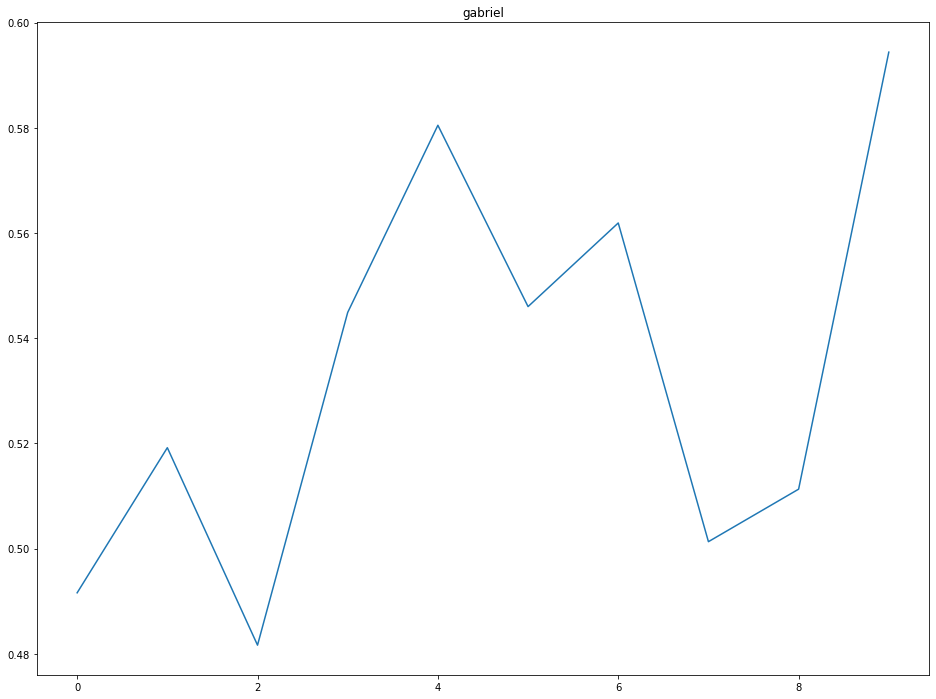

In [13]:
# Show the plot for one comedian
plt.plot(subjectivity_transcript[0])
plt.title(data['full_name'].index[4])
plt.show()

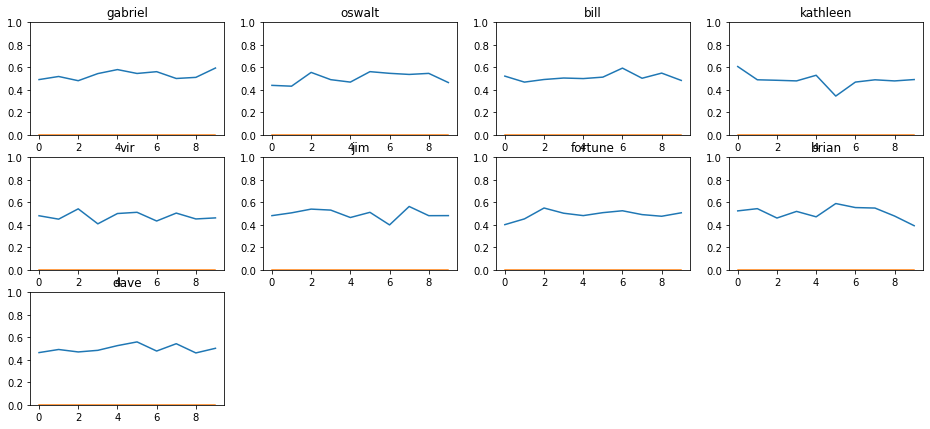

In [14]:
plt.rcParams['figure.figsize'] = [16,12]


for index, comedian in enumerate(data.index):    
    plt.subplot(5, 4, index+1)
    plt.plot(subjectivity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=0, ymax=1)
    
plt.show()

### Assignments:
1. Classify all comedian accordig to Polarity and Subjectivity.
2. Modify the number of sections the comedy routine is split into and see how the charts over time change and again classify all comedian accordig to Polarity and Subjectivity.


In [15]:
def getAnalysis(score):
    if -0.1<score < 0:
        return "Lessser Negative"
    elif 0<score < 0.1:
        return "Lesser Positive"
    elif score > 0.1:
        return "Positive"
    else:
        return "Negative"
 

In [16]:
def getAnalysis1(score):
    if  score < 0.5:
        return "Facts";
    else:
        return "Opinions"
    

In [17]:
data["Category_Polarity"] = data["polarity"].apply(getAnalysis )
data["Category_Subjective"] = data["subjectivity"].apply(getAnalysis1 )

In [18]:
data

,transcript,full_name,polarity,subjectivity,Category_Polarity,Category_Subjective
bill,"[audience cheering, whistling] [emcee] Ladies ...",gabriel,0.063112,0.533442,Lesser Positive,Opinions
brian,♪ [Rock] [crowd cheering] [man] let’s give a b...,oswalt,0.110417,0.499141,Positive,Facts
dave,This is Dave. He tells dirty jokes for a livin...,bill,-0.004069,0.513958,Lessser Negative,Opinions
fortune,[upbeat music plays] [audience cheering] [anno...,kathleen,0.131908,0.491932,Positive,Facts
gabriel,[man] Can you please state your name? Martin M...,vir,0.112966,0.475079,Positive,Facts
jim,"(audience cheering, applauding) Thank you! Tha...",jim,0.134896,0.497251,Positive,Facts
kathleen,[chattering] [man] Whoo! [chattering] [woman] ...,fortune,0.030903,0.489910,Lesser Positive,Facts
oswalt,[“Hard to Kill” by Bleached plays] [audience c...,brian,0.054186,0.507905,Lesser Positive,Opinions
vir,I lost 80% of my mind. It’s very freeing. You ...,dave,0.100228,0.498550,Positive,Facts


In [19]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t,30)
    list_pieces.append(split)


In [20]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)   
# polarity_transcript

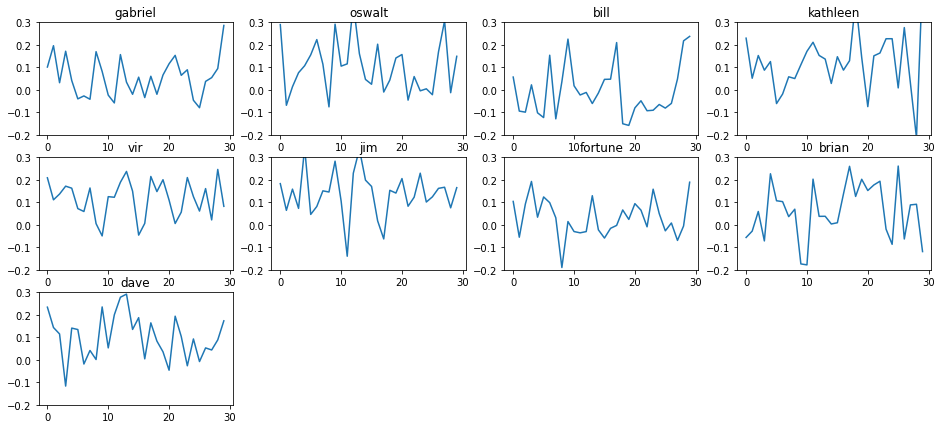

In [21]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16,12]


for index, comedian in enumerate(data.index):    
    plt.subplot(5, 4, index+1)
    plt.plot(polarity_transcript[index])
#     plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()

In [22]:
# Calculate the polarity for each piece of text

subjectivity_transcript = []
for lp in list_pieces:
    subjectivity_piece = []
    for p in lp:
        subjectivity_piece.append(TextBlob(p).sentiment.subjectivity)
    subjectivity_transcript.append(subjectivity_piece)   
# subjectivity_transcript



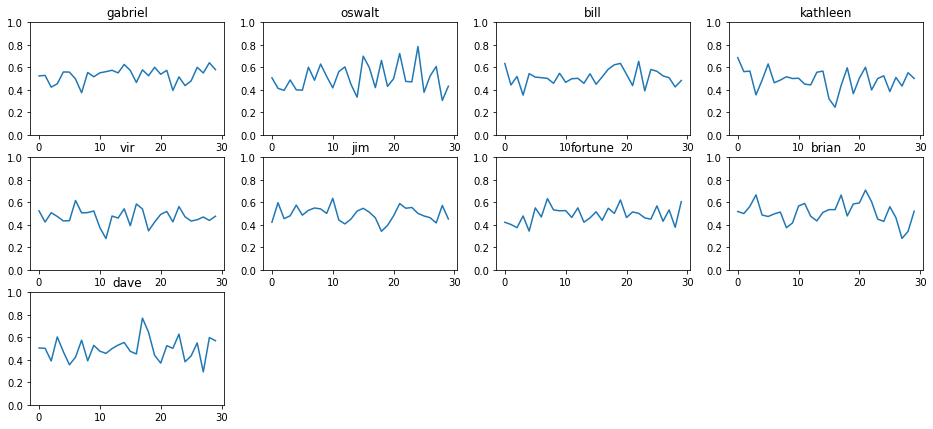

In [23]:
plt.rcParams['figure.figsize'] = [16,12]


for index, comedian in enumerate(data.index):    
    plt.subplot(5, 4, index+1)
    plt.plot(subjectivity_transcript[index])
#     plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=0, ymax=1)
    
plt.show()

* Subjectivity of Comedian is more or less around 0.5